In [2]:
import deepchem as dc

In [3]:
import os
import pandas as pd
from pubchempy import get_cids, get_compounds

In [4]:
# Read SMILES notation and pIC50 constant against the COVID-19 virus 
raw_data = pd.read_csv ('/Users/anstercharles/deepchem/Cleaned_up/DDH_Data.csv')
raw_data

,Compound No.,SMILES,pIC50 (IC50 in microM),Unnamed: 3
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255,NaN
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1,NaN
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685,NaN
3,4,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,BLINDED,NaN
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036,NaN
...,...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395,NaN
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023,NaN
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862,NaN
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278,NaN


In [5]:
# Drop last column 
raw_data = raw_data.iloc[0:, [0, 1, 2]]
# rename columns
raw_data.columns = ['label', 'smiles', 'pIC50']
raw_data

,label,smiles,pIC50
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685
3,4,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,BLINDED
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036
...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

Text(0, 0.5, 'probability')

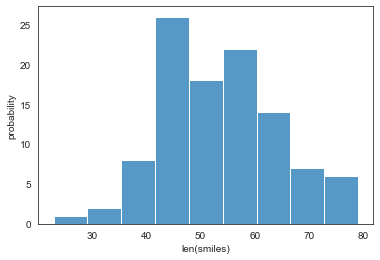

In [7]:
# Size distribution of molecules
smiles_data = raw_data
smiles_data['len'] = [len(i) if i is not None else 0 for i in smiles_data['smiles']]
smiles_lens = [len(i) if i is not None else 0 for i in smiles_data['smiles']]
sns.histplot(smiles_lens)
plt.xlabel('len(smiles)')
plt.ylabel('probability')

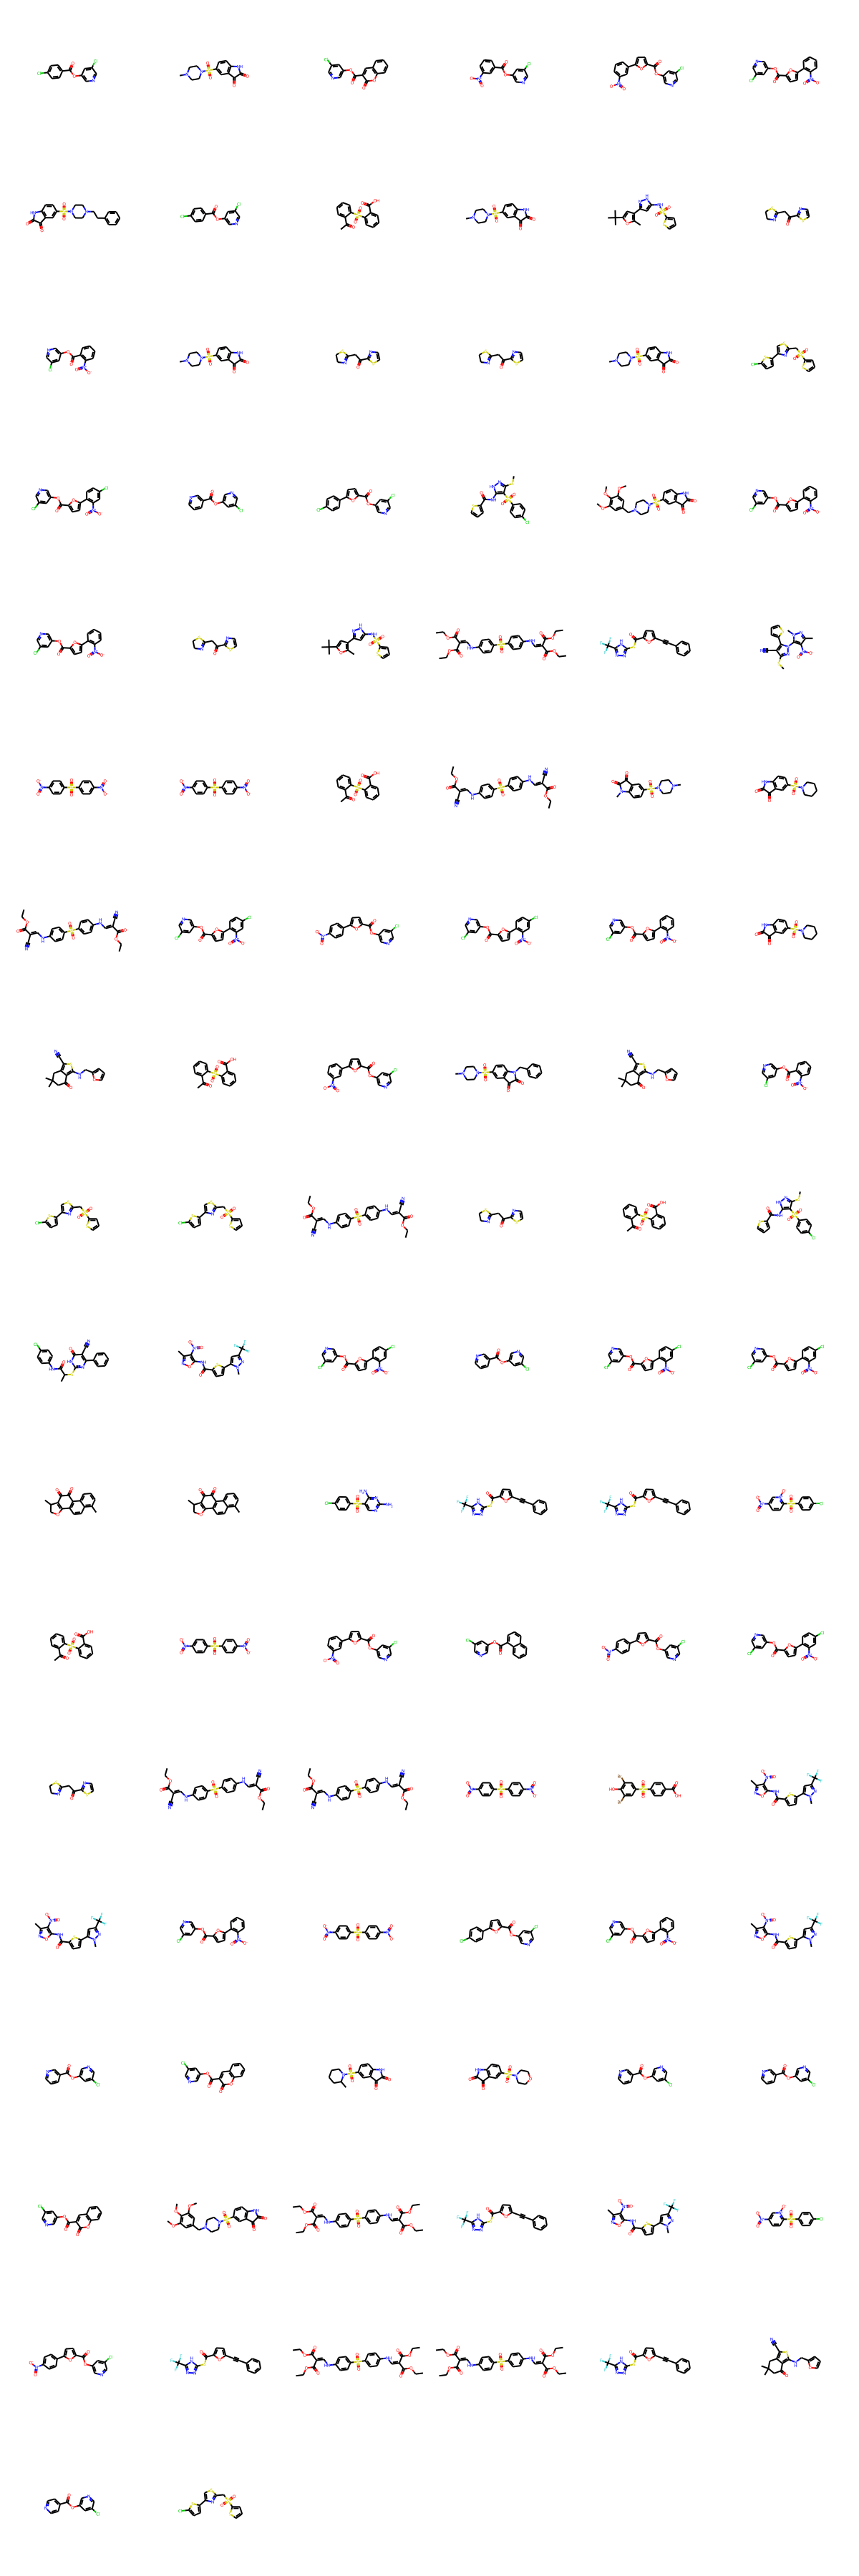

In [8]:
# indices of small molecules
small = np.array(smiles_lens)

# corresponding smiles string
small_smiles = smiles_data.loc[smiles_data.index[small]]['smiles'].values

# look
Draw._MolsToGridImage([Chem.MolFromSmiles(i) for i in small_smiles], molsPerRow=6)

In [9]:
# Removing 'Blinded' samples
smiles_data_clean = smiles_data[~smiles_data.pIC50.str.contains("BLINDED")]
smiles_data_clean

,label,smiles,pIC50,len
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255,62
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1,67
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685,66
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036,59
5,6,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,-1.176091259,58
...,...,...,...,...
99,100,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,0.022276395,45
100,101,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,-1.049218023,46
101,102,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,-1.371067862,50
102,103,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,-1.099335278,60


In [10]:
# Label actives based on pIC50 > 0.1

conditions = [
    (smiles_data_clean['pIC50'] < '0.1'),
    (smiles_data_clean['pIC50'] >= '0.1') 
    ]

values = ['0', '1']

smiles_data_clean['active'] = np.select(conditions, values)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(smiles_data_clean)

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,label,smiles,pIC50,len,active
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255,62,0
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1,67,0
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685,66,0
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036,59,0
5,6,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,-1.176091259,58,0
6,7,FC(F)(F)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC(=NO...,-1.176091259,70,0
7,8,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,-1.176091259,62,0
8,9,CCCC1=CC(Cl)=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1,-1.477121255,43,0
9,10,COC1=CC(=CC=C1)C1=C(C#N)C(=O)NC(SCC(=O)NC2=CC=...,-1.602059991,67,0
10,11,CC(C)C1=CC=C(NC(=O)CSC2=NC(=CC=N2)C2=CC=CS2)C=C1,-1.602059991,48,0


In [11]:
# Save to file
smiles_data_clean.to_csv('DDH_Data_Cleaned.csv', index=False)

In [46]:
# Featurization, Transformation of data, Conversion into DiskDataset, Stratified Splitting
ddh_tasks = ['pIC50', 'active']
featurizer = dc.feat.ConvMolFeaturizer()
#featurizer = dc.feat.CircularFingerprint()

loader = dc.data.CSVLoader(
    tasks=ddh_tasks, feature_field="smiles", featurizer=featurizer)
dataset = loader.featurize('DDH_Data_Cleaned.csv', shard_size=8192)

transformers = [
    dc.trans.NormalizationTransformer(
    transform_y=True, dataset=dataset)
]

splitters = {
    'index': dc.splits.IndexSplitter(),
    'random': dc.splits.RandomSplitter(),
    'randomstrat': dc.splits.RandomStratifiedSplitter()
}
splitter = splitters['randomstrat']
train, valid, test = splitter.train_valid_test_split(dataset)
train, valid, test

(<DiskDataset X.shape: (76,), y.shape: (76, 2), w.shape: (76, 2), ids: ['ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=CC=C2)=CC(Cl)=C1'
  'CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=NC=C1'
  'ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=CC=CC=C2)C=C1' ...
  'IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1'
  'IC1=CC=C2N(C\\C=C\\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1'
  'ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=CC=C34)S2)C=C1'], task_names: ['pIC50' 'active']>,
 <DiskDataset X.shape: (9,), y.shape: (9, 2), w.shape: (9, 2), ids: ['CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1'
  '[O-][N+](=O)C1=CC(=CC=C1S(=O)(=O)C1=CC=C(Cl)C=C1)C(F)(F)F'
  'CC1=C(C(C)=C(C#N)C(=N1)S(=O)(=O)C1=CC=CC=C1)[N+]([O-])=O'
  '[O-][N+](=O)C1=CC=CC(=C1)C(=O)OC1=CN=CC(Cl)=C1'
  'CN1CCN(CC1)S(=O)(=O)C1=CC2=C(C=C1)N(CC1=CC=CC=C1)C(=O)C2=O'
  'O=C1N(CC2=CC=C3C=CC=CC3=C2)C2=CC=C(C=C2C1=O)S(=O)(=O)N1CCCCC1'
  'BrC1=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=CC=C1'
  'ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=

In [47]:
# Check Featurizer
train.X[0], train.y[0]

(<deepchem.feat.mol_graphs.ConvMol at 0x17f163310>,
 array([-0.47712126,  0.        ]))

In [48]:
# Parameters for optimization
params_dict = {
    'n_tasks': [len(ddh_tasks)],
    'n_features': [1024],
    'mode': ['regression'],
    'dense_layer_size': [128,64,150],
    'graph_conv_layers': [[64, 64],[128,128]],
    'batch_size': [100],
    'nb_epoch': [1000],
    'dropouts': [0.2, 0.5]
}

In [49]:
# Hyperparameter optimization
optimizer = dc.hyper.GridHyperparamOpt(dc.models.GraphConvModel)
metric2 = dc.metrics.Metric(dc.metrics.pearson_r2_score)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
        params_dict, train, valid, metric2, transformers)

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_14:0", shape=(485,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_13:0", shape=(485, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_17:0", shape=(2324,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_14:0", shape=(477,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_13:0", shape=(477, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_17:0", shape=(2350,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_55/graph_pool_111/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_14:0", shape=(496,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_13:0", shape=(496, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_17:0", shape=(2306,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_14:0", shape=(478,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_13:0", shape=(478, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_113/Reshape_17:0", shape=(2328,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_112/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_112/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_112/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_56/graph_pool_112/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_14:0", shape=(484,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_13:0", shape=(484, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_17:0", shape=(2342,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_14:0", shape=(481,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_13:0", shape=(481, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_17:0", shape=(2316,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_13:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_57/graph_pool_114/Reshape_17:0", shape=(None,),

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_14:0", shape=(489,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_13:0", shape=(489, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_17:0", shape=(2312,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_14:0", shape=(496,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_13:0", shape=(496, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_17:0", shape=(2284,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_13:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_58/graph_pool_116/Reshape_17:0", shape=(None,),

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_conv_119/Reshape_25:0", shape=(0,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_conv_119/Reshape_24:0", shape=(0, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_conv_119/Cast_7:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_conv_119/Reshape_27:0", shape=(0,), dtype=int

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_14:0", shape=(476,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_13:0", shape=(476, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_17:0", shape=(2372,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_59/graph_pool_118/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_14:0", shape=(495,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_13:0", shape=(495, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_17:0", shape=(2320,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_14:0", shape=(487,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_13:0", shape=(487, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_17:0", shape=(2348,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_60/graph_pool_120/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_122/Reshape_14:0", shape=(487,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_122/Reshape_13:0", shape=(487, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_122/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_122/Reshape_17:0", shape=(2314,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_123/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_123/Reshape_13:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_123/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_61/graph_pool_123/Reshape_17:0", shape=(None,),

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_14:0", shape=(489,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_13:0", shape=(489, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_17:0", shape=(2298,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_14:0", shape=(484,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_13:0", shape=(484, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_17:0", shape=(2316,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_13:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_62/graph_pool_125/Reshape_17:0", shape=(None,),

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_14:0", shape=(482,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_13:0", shape=(482, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_17:0", shape=(2368,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_17:0", shape=(2382,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_16:0", shape=(2382, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Cast_5:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_127/Reshape_20:0", shape=(2460,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_126/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_126/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_126/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_63/graph_pool_126/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_conv_129/Reshape_29:0", shape=(0,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_conv_129/Reshape_28:0", shape=(0, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_conv_129/Cast_9:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_14:0", shape=(499,), dtype=i

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_14:0", shape=(484,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_13:0", shape=(484, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_17:0", shape=(2282,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_64/graph_pool_128/Reshape_17:0", shape=(None,), 

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_14:0", shape=(503,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_13:0", shape=(503, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_17:0", shape=(2330,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_14:0", shape=(488,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_13:0", shape=(488, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_65/graph_pool_130/Reshape_17:0", shape=(2358,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Reshape_14:0", shape=(487,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Reshape_13:0", shape=(487, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Reshape_17:0", shape=(2336,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_14:0", shape=(487,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_13:0", shape=(487, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_17:0", shape=(2336,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_14:0", shape=(481,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_13:0", shape=(481, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_132/Reshape_17:0", shape=(2350,), d

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Reshape_23:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Reshape_22:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_pool_133/Cast_7:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_66/graph_conv_133/Reshape_17:0", shape=(None,),

In [50]:
# All models
all_results

{'_batch_size_100_dense_layer_size_128_dropouts_0.200000_graph_conv_layers[64, 64]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.07798700140524689,
 '_batch_size_100_dense_layer_size_128_dropouts_0.500000_graph_conv_layers[64, 64]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.03023318180252777,
 '_batch_size_100_dense_layer_size_128_dropouts_0.200000_graph_conv_layers[128, 128]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.05962302638377984,
 '_batch_size_100_dense_layer_size_128_dropouts_0.500000_graph_conv_layers[128, 128]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.07106577347379006,
 '_batch_size_100_dense_layer_size_64_dropouts_0.200000_graph_conv_layers[64, 64]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.07775975773931153,
 '_batch_size_100_dense_layer_size_64_dropouts_0.500000_graph_conv_layers[64, 64]_moderegression_n_features_1024_n_tasks_2_nb_epoch_1000': 0.009746245366145772,
 '_batch_size_100_dense_layer_s

In [55]:
# Using best model to Predict the pIC50 values
model = dc.models.GraphConvModel(n_tasks=2, dense_layer_size=150, mode='regression', dropout=0.5)

In [56]:
# Run for 1000 epochs
model.fit(train, nb_epoch=1500)

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_137/Reshape_14:0", shape=(475,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_137/Reshape_13:0", shape=(475, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_137/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_137/Reshape_17:0", shape=(2326,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_14:0", shape=(475,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_13:0", shape=(475, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_17:0", shape=(2326,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_14:0", shape=(484,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_13:0", shape=(484, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_17:0", shape=(2350,), dt

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_14:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_13:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_68/graph_pool_136/Reshape_17:0", shape=(None,), 

0.05205183982849121

In [57]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train, [metric]))

Training set score: {'pearson_r2_score': 0.8601478928080637}


In [58]:
print("Test set score:", model.evaluate(test, [metric]))

Test set score: {'pearson_r2_score': 0.7084582334897307}


In [165]:
# Now try to predict classification
# Featurization, Transformation of data, Conversion into DiskDataset, Splitting
ddh_tasks2 = ['active']
featurizer2 = dc.feat.ConvMolFeaturizer()

loader = dc.data.CSVLoader(
    tasks=ddh_tasks2, feature_field="smiles", featurizer=featurizer2)
dataset2 = loader.featurize('DDH_Data_Cleaned.csv', shard_size=8192)

transformers = [
    dc.trans.NormalizationTransformer(
    transform_y=True, dataset=dataset)
]

splitters = {
    'index': dc.splits.IndexSplitter(),
    'random': dc.splits.RandomSplitter(),
    'randomstrat': dc.splits.RandomStratifiedSplitter()
}
splitter = splitters['randomstrat']
train2, valid2, test2 = splitter.train_valid_test_split(dataset2)
train2, valid2, test2

(<DiskDataset X.shape: (75,), y.shape: (75, 1), w.shape: (75, 1), ids: ['ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=CC=C2)=CC(Cl)=C1'
  'CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1'
  'CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=NC=C1' ...
  'IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1'
  'ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1'
  'ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=CC=C34)S2)C=C1'], task_names: ['active']>,
 <DiskDataset X.shape: (9,), y.shape: (9, 1), w.shape: (9, 1), ids: ['COC1=CC=C(C=C1)C1=NC(SCC(=O)NC2=CC=C(C=C2)C(C)C)=NC=C1'
  'CC1COC2=C1C(=O)C(=O)C1=C3CCCC(C)(C)C3=CC=C21'
  'CC(C)C1=CC2=CC=C3C(CCCC3(C)C)=C2C(=O)C1=O'
  'CC1=C(C(C)=C(C#N)C(=N1)S(=O)(=O)C1=CC=CC=C1)[N+]([O-])=O'
  'CSC1=NN(C2=C(C(C)=NN2C)[N+]([O-])=O)C(C2=CC=CS2)=C1C#N'
  'CN1N=C(C)C(=C1NCC1=CC=C(S1)C1=CC=CS1)[N+]([O-])=O'
  '[O-][N+](=O)C1=CC=CC(=C1)C1=CC=C(O1)C(=O)OC1=CN=CC(Cl)=C1'
  'CN1C(=O)C(=O)C2=C1C=CC(=C2)S(=O)(=O)N1CCN(C)CC1'
  'IC1=CC=C2N(C\\C=C\\

In [171]:
# Model to Predict the classification: active vs non-active
model2 = dc.models.GraphConvModel(n_tasks=1, mode='classification', dropout=0.2)
metric2 = dc.metrics.Metric(dc.metrics.roc_auc_score)

In [174]:
# 100 epochs
model2.fit(train2, nb_epoch=100)

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_14:0", shape=(485,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_13:0", shape=(485, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_17:0", shape=(2356,), dtype=

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_14:0", shape=(481,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_13:0", shape=(481, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_pool_35/Reshape_17:0", shape=(2382,), dtype=

/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_conv_35/Reshape_13:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_conv_35/Reshape_12:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_conv_35/Cast_1:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/Users/anstercharles/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_17/graph_conv_35/Reshape_15:0", shape=(None,), dtyp

0.062284235954284665

In [175]:
metric2 = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model2.evaluate(train2, [metric]))

Training set score: {'roc_auc_score': 1.0}


In [176]:
print("Test set score:", model2.evaluate(test2, [metric]))

Test set score: {'roc_auc_score': 1.0}
